In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import urllib.request
import pandas as pd 
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
df1 = pd.read_csv('dl.csv', sep = ';')

In [3]:
ilosc_los = 6000

In [4]:
last_index = df1["Numer losowania"].index[-1]

In [5]:
first_index = last_index - ilosc_los + 1

In [6]:
df1["Lista"] = df1["Wylosowane liczby"].apply(lambda x: list(x.split(',')))

In [7]:
df1["Numery"] = df1["Lista"].apply(lambda x: list([int(y) for y in x]))

In [8]:
df1["Średnia"] = df1["Numery"].apply(lambda x: np.mean(x))

In [9]:
df1["Liczba parzystych liczb"] = df1["Numery"].apply(lambda x: sum(1 for liczba in x if liczba % 2 == 0))

In [10]:
liczniki = df1["Liczba parzystych liczb"][first_index : last_index+1].value_counts().sort_index().tolist()

In [11]:
#df3 = pd.DataFrame(liczniki, index=['P0 N6', 'P1 N5', 'P2 N4', 'P3 N3', 'P4 N2', 'P5 N1', 'P6 N0'])

In [12]:
# Postanowiłam jako indeksy podać % występowania, ponieważ indeksy wyświetlają się obok wykresu i chciałam to wykorzystać,
# by właśnie tam znajdowały się procenty. A miejsce etykiet będzie w legendzie. 
# Jednak przez to musiałam stworzyć legendę ręcznie. 

In [13]:
df3 = pd.DataFrame(liczniki, index=[str(round((liczniki[i]/sum(liczniki)*100),2))+'%' for i in range(len(liczniki))])

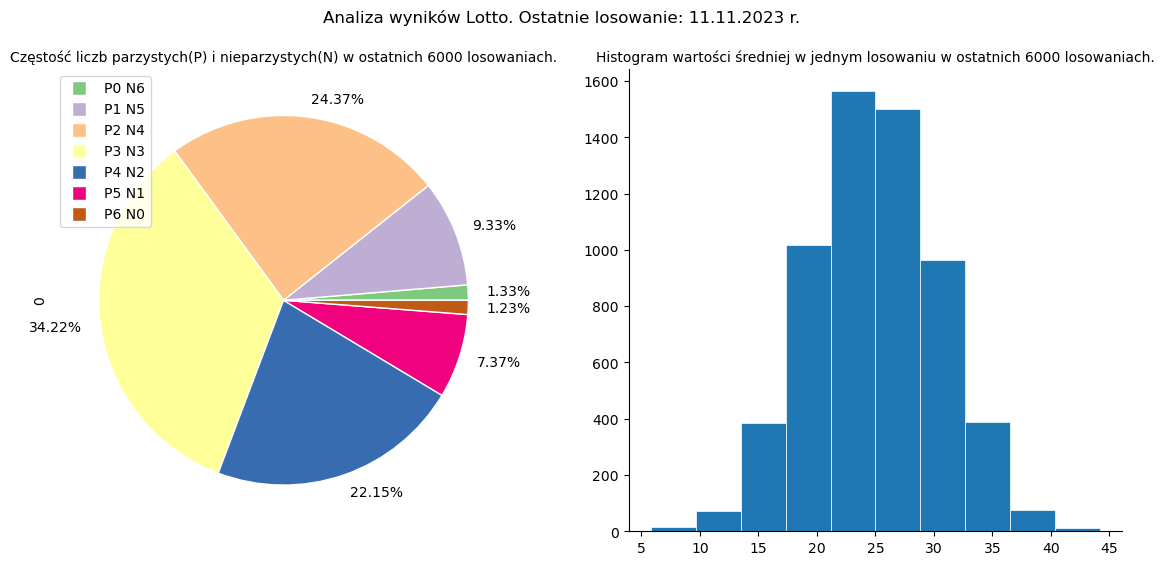

In [14]:
cmap = plt.get_cmap('Accent')
kolory = [cmap(i) for i in range(len(df3))]

fig, axes = plt.subplots(1,2, figsize=(14,6))

plt.suptitle("Analiza wyników Lotto. Ostatnie losowanie: {} r.".format(df1["Data losowania"][df1["Data losowania"].index[-1]]))

df3.plot.pie(subplots=True, ax=axes[0],legend=False, colors=kolory, wedgeprops=dict(linewidth=1, edgecolor='white'))
axes[0].set_title('Częstość liczb parzystych(P) i nieparzystych(N) w ostatnich {} losowaniach.'.format(ilosc_los), fontsize=10)

legend_patches = [Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10) for color in kolory]
axes[0].legend(legend_patches, ['P0 N6', 'P1 N5', 'P2 N4', 'P3 N3', 'P4 N2', 'P5 N1', 'P6 N0'], loc='upper left')

df1["Średnia"][first_index : last_index+1].hist(ax = axes[1], grid=False, edgecolor='white', linewidth=0.5)
axes[1].set_title('Histogram wartości średniej w jednym losowaniu w ostatnich {} losowaniach.'.format(ilosc_los), fontsize=10)
axes[1].spines['right'].set_color('none')
axes[1].spines['top'].set_color('none')

plt.savefig("zad04_Agata_Jastrzebska_281633.svg",bbox_inches='tight')
plt.show()